<a href="https://colab.research.google.com/github/MrH101/stock_prediction/blob/main/Kbs_project_Stock_market_analysis_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

Cuthbert Musengi

>lovemore mbizo

Norest Hoko

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libralies

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time 
import math
import seaborn as sns

Importing Data from IBM dataset obtained from yahoo finance IBM historical data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IBM.csv')
training_set = df.iloc[:, 1: 2].values

Overview of Import Data 

Visualization of Data

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-06-09,119.8750,120.7500,118.87500,119.68750,74.545189,4739100
1,2000-06-12,119.1250,120.4375,118.84375,118.84375,74.019714,3640300
2,2000-06-13,118.8750,119.9375,116.75000,119.31250,74.311661,4008600
3,2000-06-14,118.8750,120.0000,115.50000,116.00000,72.248528,5282600
4,2000-06-15,116.0000,119.0000,115.87500,116.81250,72.754570,5386300
5,2000-06-16,116.3125,117.6875,113.25000,113.25000,70.535744,8046200
6,2000-06-19,113.5000,120.3750,113.25000,120.37500,74.973434,6059200
7,2000-06-20,120.0000,120.6875,115.37500,116.37500,72.482094,7103800
8,2000-06-21,115.5625,115.9375,113.50000,114.50000,71.314278,6487000
9,2000-06-22,114.1250,114.3125,111.25000,111.81250,69.640419,4853100


In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5272,2021-05-25,144.919998,145.000000,143.199997,143.789993,143.789993,3937200
5273,2021-05-26,143.500000,143.990005,143.039993,143.380005,143.380005,3083800
5274,2021-05-27,143.820007,144.770004,143.630005,143.820007,143.820007,5630300
5275,2021-05-28,144.210007,144.330002,143.490005,143.740005,143.740005,2534600
5276,2021-06-01,145.000000,145.830002,143.750000,144.190002,144.190002,2417500
5277,2021-06-02,144.619995,145.750000,144.110001,145.720001,145.720001,2786900
5278,2021-06-03,144.910004,145.880005,144.039993,145.550003,145.550003,4130600
5279,2021-06-04,146.000000,147.550003,145.759995,147.419998,147.419998,3116700
5280,2021-06-07,147.550003,148.740005,147.169998,148.020004,148.020004,3462700
5281,2021-06-08,148.119995,150.199997,148.119995,149.070007,149.070007,5078300


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5.282000e+03
mean,129.614704,130.772695,128.553030,129.679796,96.576321,6.053105e+06
std,37.503204,37.569764,37.434612,37.509144,34.039551,3.321021e+06
min,54.650002,56.700001,54.009998,55.070000,34.740570,1.027500e+06
25%,95.152503,96.500000,94.417502,95.360001,61.736151,3.842200e+06
50%,125.744999,126.884998,124.590001,125.795002,99.618748,5.218150e+06
75%,157.247498,158.582496,155.742497,156.957505,127.200449,7.297650e+06
max,215.380005,215.899994,214.300003,215.800003,157.775299,4.120730e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5282 non-null   object 
 1   Open       5282 non-null   float64
 2   High       5282 non-null   float64
 3   Low        5282 non-null   float64
 4   Close      5282 non-null   float64
 5   Adj Close  5282 non-null   float64
 6   Volume     5282 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 289.0+ KB


# Checking for null Values

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
mid = pd.date_range(start='2000-06-09', end='2020-06-09', freq='B')
mid[~mid.isin(df.Date.unique())]

DatetimeIndex(['2000-07-04', '2000-09-04', '2000-11-23', '2000-12-25',
               '2001-01-01', '2001-01-15', '2001-02-19', '2001-04-13',
               '2001-05-28', '2001-07-04',
               ...
               '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-04-10', '2020-05-25'],
              dtype='datetime64[ns]', length=187, freq=None)

187 missing Dates this could have been caused by an error within the api since there are no null values but rather missing cells

Adding the price tab for our stocks by calculating the average of the open,high,low and close values

In [ ]:
values = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
df = df.assign(Price=values)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2000-06-09,119.875,120.7500,118.87500,119.68750,74.545189,4739100,119.796875
1,2000-06-12,119.125,120.4375,118.84375,118.84375,74.019714,3640300,119.312500
2,2000-06-13,118.875,119.9375,116.75000,119.31250,74.311661,4008600,118.718750
3,2000-06-14,118.875,120.0000,115.50000,116.00000,72.248528,5282600,117.593750
4,2000-06-15,116.000,119.0000,115.87500,116.81250,72.754570,5386300,116.921875


In [ ]:
df.Price.describe()

count    5282.000000
mean      129.655056
std        37.497230
min        55.657500
25%        95.340001
50%       125.661251
75%       157.213754
max       214.985001
Name: Price, dtype: float64

Data visualization through plots


1)plot showing closing value against date

2)plot showing price against date

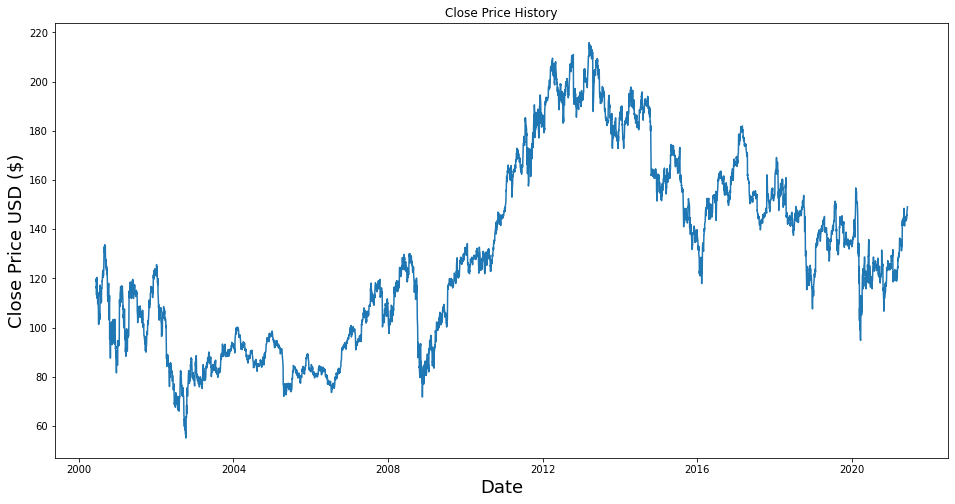

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df["Close"],label='Close Price history')



Ploting for price against Date

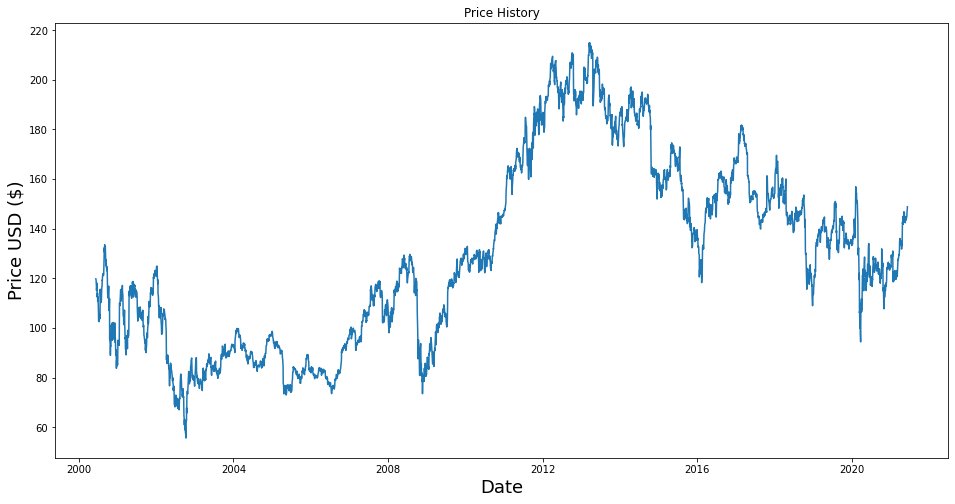

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(df["Price"],label='Close Price history')


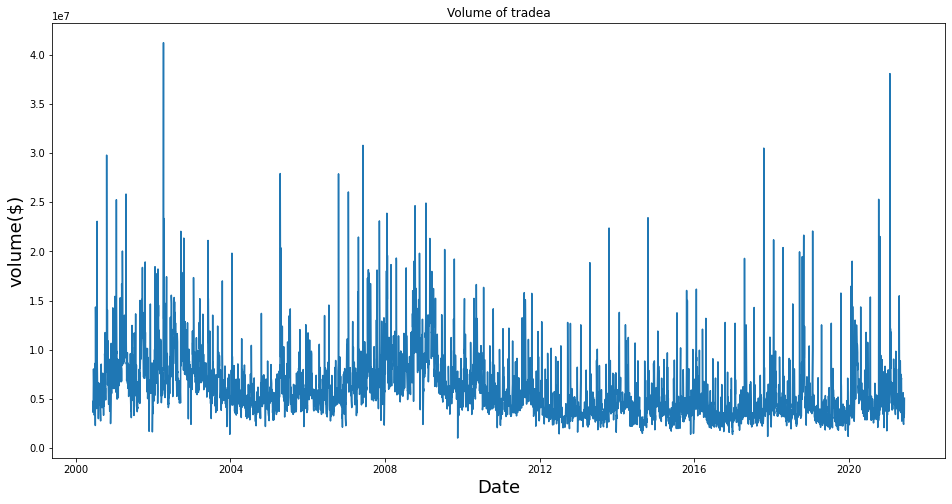

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('Volume of tradea')
plt.xlabel('Date', fontsize=18)
plt.ylabel('volume($)', fontsize=18)
plt.plot(df["Volume"],label='volume')


In [ ]:
import matplotlib.dates as mdates

Ploting subplots

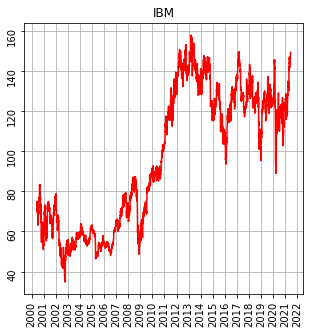

In [ ]:
#subplot
f, ax=plt.subplots(figsize=(5,5),sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())
ax.plot(df.index, df['Adj Close'],color='r')
ax.grid(True)
ax.tick_params(labelrotation=90)
ax.set_title('IBM');

Displaying necessary values and columns

In [ ]:
#Daily Percentage
daily_close_ibm = df[['Adj Close']]

# Daily returns
daily_pct_change_ibm = daily_close_ibm.pct_change()

# Replace NA values with 0
daily_pct_change_ibm.fillna(0, inplace=True)

daily_pct_change_ibm.head()

,Adj Close
Date,
2000-06-09,0.000000
2000-06-12,-0.007049
2000-06-13,0.003944
2000-06-14,-0.027763
2000-06-15,0.007004


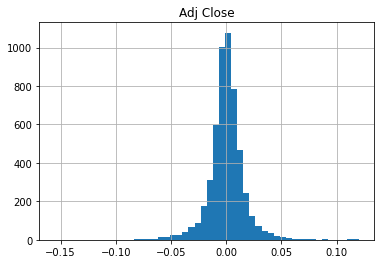

In [ ]:
daily_pct_change_ibm.hist(bins=50)

# Show the plot
plt.show()

In [ ]:
#Volatility
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change_ibm.rolling(min_periods).std() * np.sqrt(min_periods) 

vol.fillna(0,inplace=True)

vol.tail()

,Adj Close
Date,
2021-06-02,0.115223
2021-06-03,0.114950
2021-06-04,0.115324
2021-06-07,0.115280
2021-06-08,0.113995


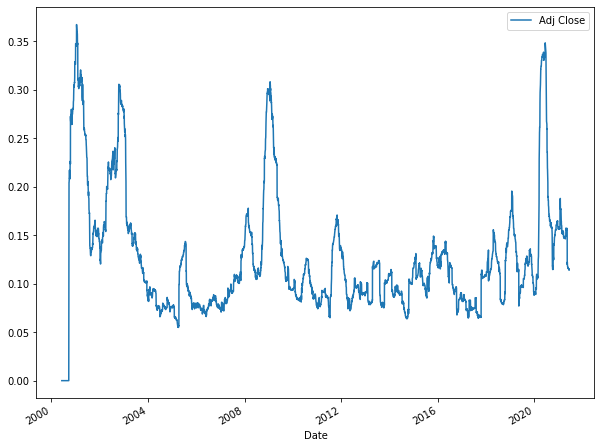

In [ ]:
# Plot volatility
vol.plot(figsize=(10, 8))

plt.show()


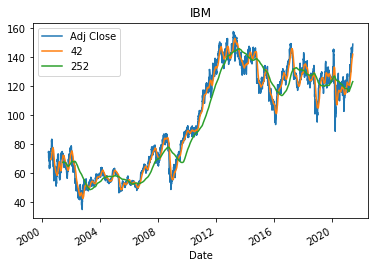

In [ ]:
#Rolling Means (Trends and Seasonality)
ibm_adj_close_px = df['Adj Close']
# Short moving window rolling mean
df['42'] = ibm_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = ibm_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df[['Adj Close', '42', '252']].plot(title="IBM")

# Showing plot
plt.show()

# **Showing only necessary data**

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
    training_data_len = int(np.ceil( len(new_dataset) * .95 ))
new_dataset

,Date,Close
0,2000-06-09 00:00:00,119.688
1,2000-06-12 00:00:00,118.844
2,2000-06-13 00:00:00,119.312
3,2000-06-14 00:00:00,116
4,2000-06-15 00:00:00,116.812
...,...,...
5277,2021-06-02 00:00:00,145.72
5278,2021-06-03 00:00:00,145.55
5279,2021-06-04 00:00:00,147.42
5280,2021-06-07 00:00:00,148.02


# **Feature scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df2 = sc.fit_transform(training_set)

In [ ]:
df2

array([[0.40580475],
       [0.40113854],
       [0.39958313],
       ...,
       [0.56834441],
       [0.57798793],
       [0.5815342 ]])

# Normalization

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
train_data = final_dataset[0:int(training_data_len), :]
x_train = []
Y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    Y_train.append(train_data[i, 0])
    X_train, y_train = np.array(x_train), np.array(Y_train)
  

In [ ]:
X_train, Y_train = np.array(x_train), np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(4958, 60, 1)

# Building our model

In [ ]:
regressor = Sequential()

In [ ]:
# first layer
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))

In [ ]:
# second layer
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
# third layer
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
# fourth layer
regressor.add(LSTM(units=50, return_sequences=False,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))


In [ ]:
regressor.add(Dense(units=1))

# compiling the model

In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 48s - loss: 0.0032


In [ ]:
# Create the testing datset
# Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
# Create the datasets x_test and y_test
x_test = []
y_test = final_dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(264, 60, 1)

In [ ]:
# Get the models predicted values
predictions = regressor.predict(x_test)
predictions = sc.inverse_transform(predictions)


In [ ]:
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

5.884405816345216

In [ ]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

491181962.24937826

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

501969976.2175252

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


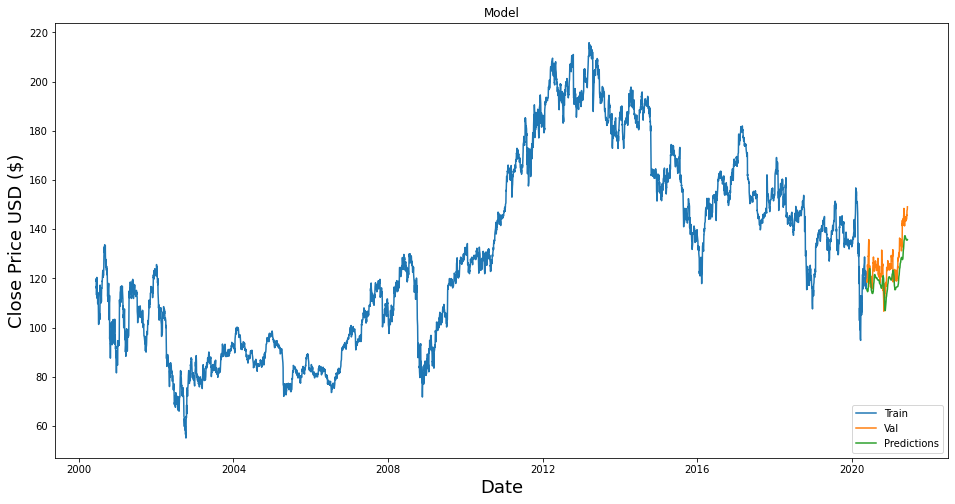

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Price,42,252,Predictions
Date,,,,,,,,,,,
2020-05-21,2020-05-21,120.989998,121.720001,118.970001,119.120003,113.107758,4000900,120.200001,111.767169,123.536698,115.573586
2020-05-22,2020-05-22,119.370003,119.470001,117.589996,118.389999,112.414597,4180800,118.705000,111.933192,123.506929,115.126007
2020-05-26,2020-05-26,121.300003,122.620003,121.010002,121.760002,115.614510,5469300,121.672502,112.293055,123.490252,114.794800
2020-05-27,2020-05-27,123.940002,125.830002,123.470001,125.540001,119.203728,5727500,124.695002,112.627870,123.494361,114.593056
2020-05-28,2020-05-28,126.870003,126.970001,124.220001,124.529999,118.244705,3915300,125.647501,112.985558,123.497431,114.563255
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02,2021-06-02,144.619995,145.750000,144.110001,145.720001,145.720001,2786900,145.049999,140.701111,122.776024,135.484909
2021-06-03,2021-06-03,144.910004,145.880005,144.039993,145.550003,145.550003,4130600,145.095001,141.003885,122.867347,135.457153
2021-06-04,2021-06-04,146.000000,147.550003,145.759995,147.419998,147.419998,3116700,146.682499,141.348711,122.966694,135.481262


In [ ]:
X_test=[]
for i in range(60,df2.shape[0]):
    X_test.append(df2[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=regressor.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
regressor.save("saved_model.h5")
